## Bibliotecas

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from FFT import *

## Formulação da FFT

A DFT pode ser dividida em componentes pares e ímpares:

$$
X[k] = \sum_{n=0}^{\frac{N}{2}-1} x[2n] W_{\frac{N}{2}}^{nk} + W_N^k \cdot \sum_{n=0}^{\frac{N}{2}-1} x[2n+1] W_{\frac{N}{2}}^{nk}
$$

Essa equação resulta em duas DFTs de ordem menor, $X_e[k]$ e $X_o[k]$. Dessa forma, tem-se:

$$
X[k] = X_e[k] + W_N^k \cdot X_o[k]
$$

Como $X[k]$ é periódica em $N$, e $X_e[k]$ e $X_o[k]$ são periódicas em $\frac{N}{2}$, é possível estabelecer a seguinte relação:

$$
X\left[k + \frac{N}{2}\right] = X_e[k] - W_N^k \cdot X_o[k]
$$

Dessa forma, é possível calcular a primeira metade de $X[k]$ a partir da soma das partes par e ímpar ponderadas, e a segunda metade pela subtração.

Além disso não há preocupação com o bit-reverse, uma vez que a própria divisão recursiva garante isso.

Exemplo:

$$
x[n] = [0, 1, 2, 3, 4, 5, 6, 7]
$$

Primeira Divisão:
$$
[0, 2, 4, 6],\quad [1, 3, 5, 7]
$$

Segunda Divisão:
$$
[0, 4],\quad [2, 6],\quad [1, 5],\quad [3, 7],\quad
$$

Terceira Divisão:
$$
[0],\quad [4],\quad [2],\quad [6],\quad [1],\quad [5],\quad [3],\quad [7]
$$

### Função para mostrar resultado

In [9]:
def show_results(x_n, X_k):
  X_k_mod = np.abs(X_k)
  X_k_phase = np.angle(X_k)

  # Plot do sinal no tempo
  plt.figure(figsize=(16, 4))
  plt.stem(x_n)
  plt.title('Sinal no Tempo (x[n])')
  plt.xlabel('n')
  plt.ylabel('Amplitude')
  plt.grid(True)

  # Plot do módulo da FFT
  plt.figure(figsize=(16, 4))

  plt.subplot(1,2,1)
  plt.stem(X_k_mod)
  plt.title('Módulo da FFT (|X[k]|)')
  plt.xlabel('k')
  plt.ylabel('Magnitude')
  plt.grid(True)

  # Plot da fase da FFT
  plt.subplot(1,2,2)
  plt.stem(np.unwrap(X_k_phase)) # Unwrap para evitar saltos abruptos na fase
  plt.title('Fase da FFT (∠X[k])')
  plt.xlabel('k')
  plt.ylabel('Fase (radianos)')
  plt.grid(True)

  plt.show()

## Exemplos

### Impulso na origem

$\delta[n]$

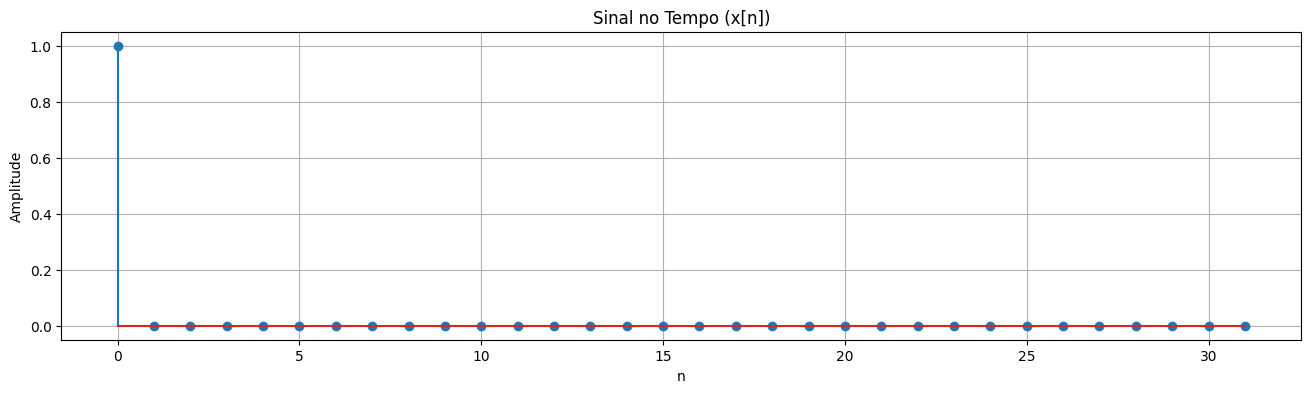

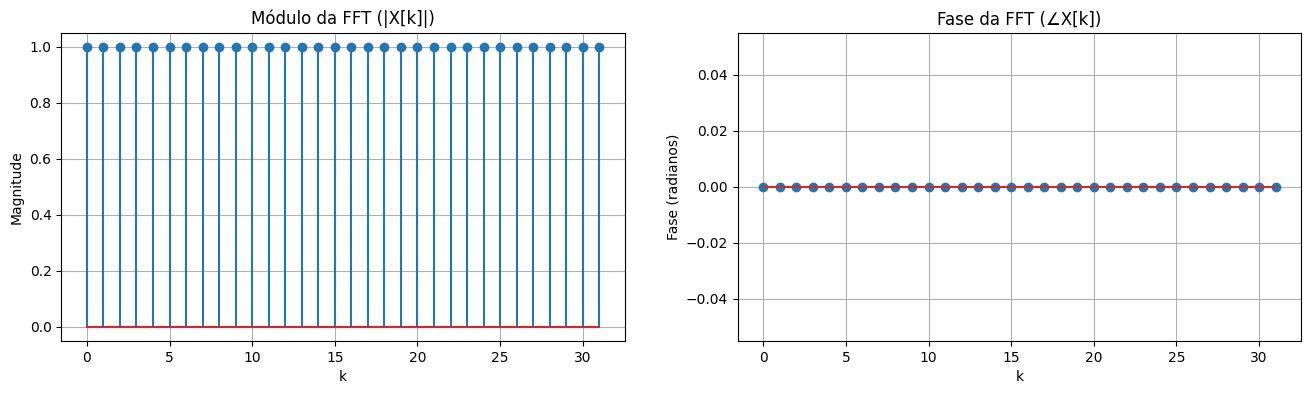

In [10]:
x_n = [1, 0, 0, 0]
x_n_zp = zero_padding(x_n, 32)

X_k = myFFT(x_n_zp)

show_results(x_n_zp, X_k)


### Impulso deslocado

$\delta[n-1]$

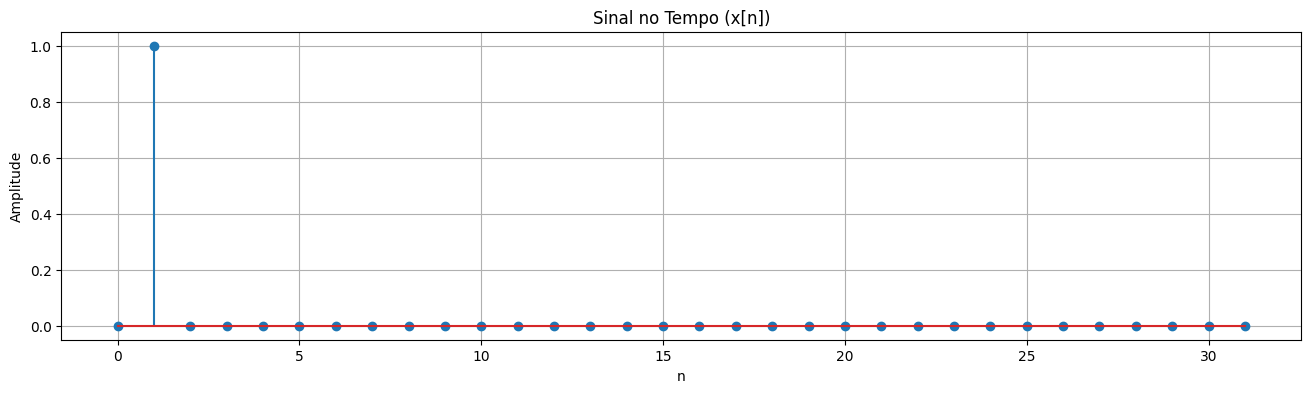

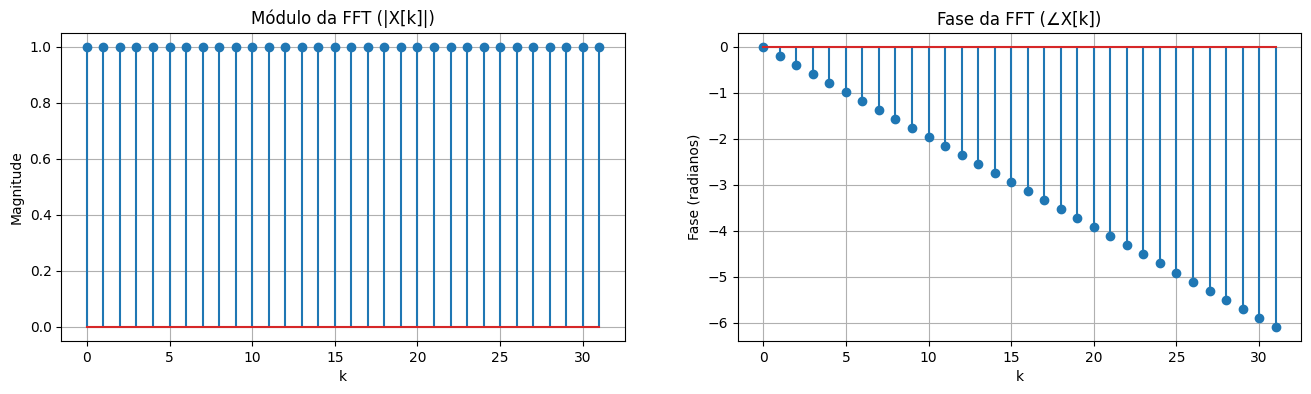

In [11]:
x_n = [0, 1, 0, 0]
x_n_zp = zero_padding(x_n, 32)

X_k = myFFT(x_n_zp)

show_results(x_n_zp, X_k)


### Cosseno

$
\cos\left(\frac{2\pi}{32}n\right)
$

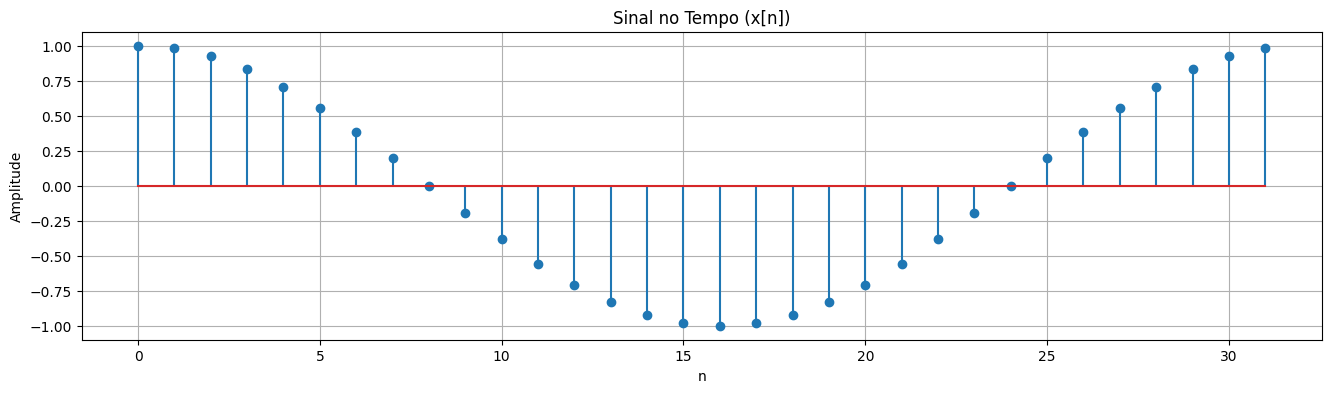

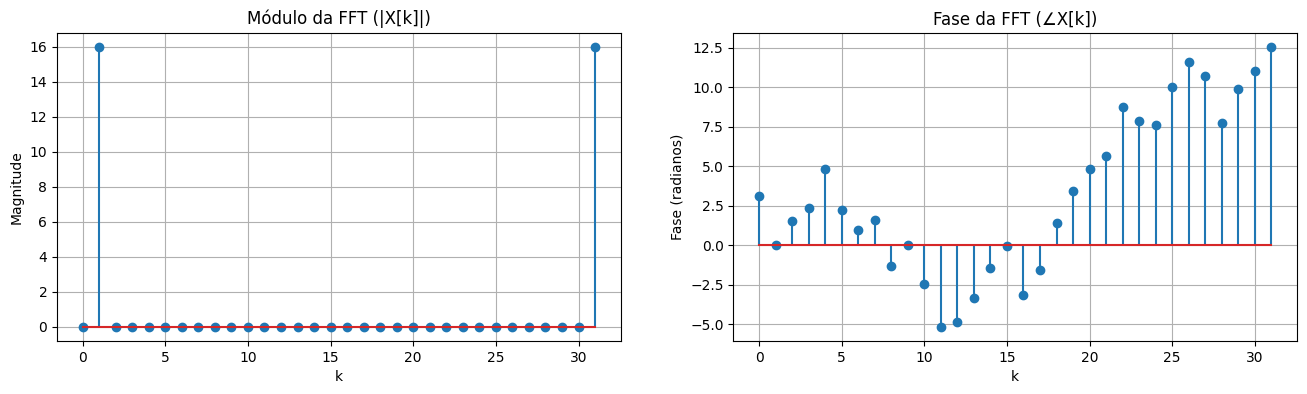

In [12]:
x_n = np.cos(2*(np.pi/32)*np.arange(0, 32))
x_n_zp = zero_padding(x_n)

X_k = myFFT(x_n_zp)

show_results(x_n_zp, X_k)

### Soma de cossenos

$
5\cos\left(\frac{2\pi}{8}n\right) + 10\cos\left(\frac{2\pi}{30}n\right)
$

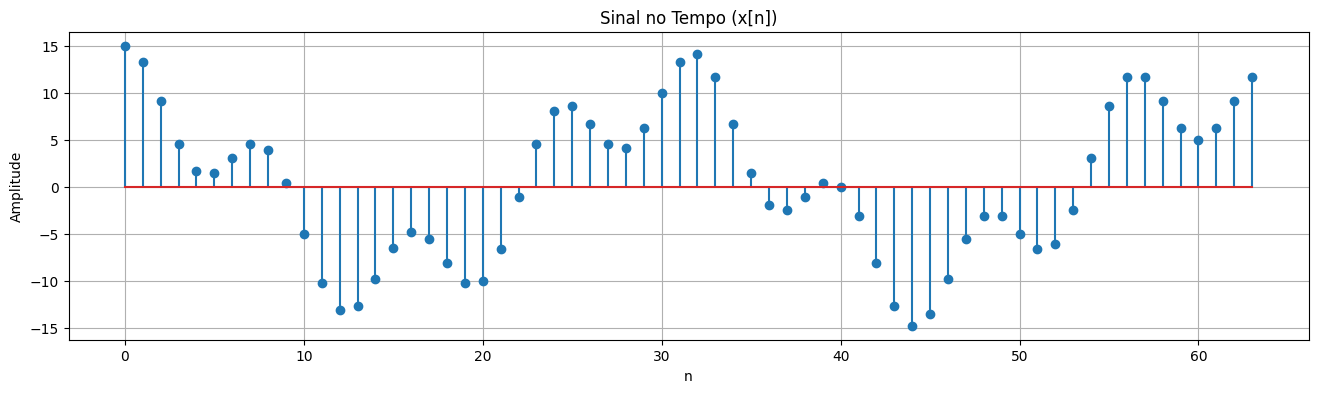

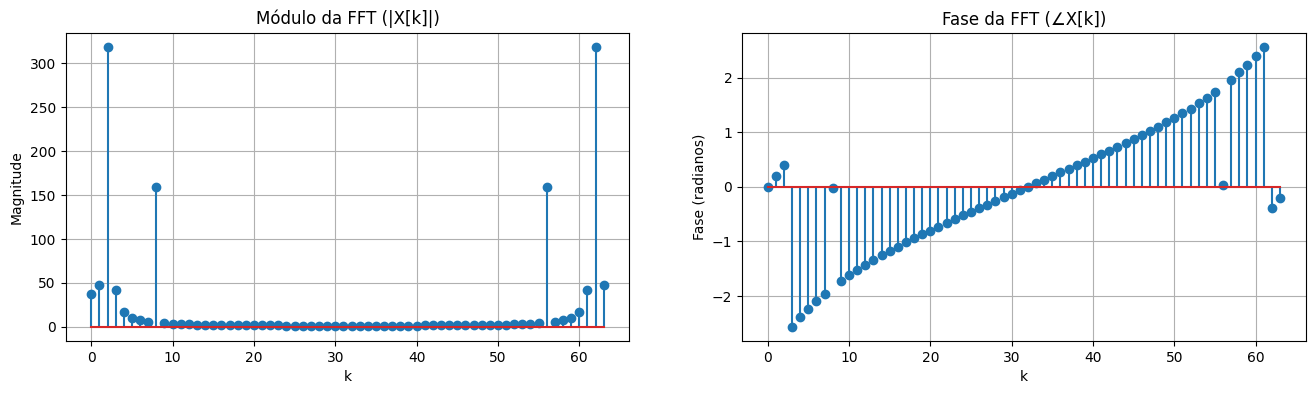

In [13]:
x_n = 5 * np.cos(2*(np.pi/8)*np.arange(0, 64)) + 10 * np.cos(2*(np.pi/30)*np.arange(0, 64))

x_n_zp = zero_padding(x_n)

X_k = myFFT(x_n_zp)

show_results(x_n_zp, X_k)
